<a href="https://colab.research.google.com/github/Taiba-Naz/Baby-Monitoring-System/blob/main/BMS_Model_1(baby_status__Image_Classification_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The TensorFlow Lite Model Maker library simplifies the process of training a TensorFlow Lite model using custom dataset. It uses transfer learning to reduce the amount of training data required and shorten the training time.



we first need to install several required packages, including Model Maker package that in GitHub [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [1]:
!pip install -q tflite-model-maker

     |████████████████████████████████| 591 kB 3.9 MB/s 
     |████████████████████████████████| 103 kB 40.7 MB/s 
     |████████████████████████████████| 211 kB 38.9 MB/s 
     |████████████████████████████████| 679 kB 40.9 MB/s 
     |████████████████████████████████| 120 kB 40.9 MB/s 
     |████████████████████████████████| 87 kB 6.4 MB/s 
     |████████████████████████████████| 1.2 MB 41.5 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 840 kB 46.0 MB/s 
     |████████████████████████████████| 1.1 MB 44.3 MB/s 
     |████████████████████████████████| 6.3 MB 43.2 MB/s 
     |████████████████████████████████| 636 kB 40.9 MB/s 
     |████████████████████████████████| 37.1 MB 40 kB/s 
     |████████████████████████████████| 99 kB 8.1 MB/s 
     |████████████████████████████████| 352 kB 33.6 MB/s 
     |████████████████████████████████| 200 kB 50.1 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import the required packages.
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

### Get the data path

Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [29]:
image_path = '/content/drive/MyDrive/train_bms'

#Step 1.   Load input data specific to an on-device ML app. Split it into training data and testing data.

In [30]:
data = DataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)


INFO:tensorflow:Load image with size: 175, num_label: 2, labels: baby_not_sleeping, baby_sleeping .


INFO:tensorflow:Load image with size: 175, num_label: 2, labels: baby_not_sleeping, baby_sleeping .


#Step 2. Customize the TensorFlow model.





In [35]:
model = image_classifier.create(train_data=train_data, validation_data=validation_data, epochs=30)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_7 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


4/4 [==============================] - 4s 474ms/step - loss: 0.7809 - accuracy: 0.5000
Epoch 2/30
4/4 [==============================] - 2s 425ms/step - loss: 0.6836 - accuracy: 0.6172
Epoch 3/30
4/4 [==============================] - 2s 432ms/step - loss: 0.5402 - accuracy: 0.7422
Epoch 4/30
4/4 [==============================] - 2s 424ms/step - loss: 0.4707 - accuracy: 0.8359
Epoch 5/30
4/4 [==============================] - 2s 403ms/step - loss: 0.4752 - accuracy: 0.8828
Epoch 6/30
4/4 [==============================] - 2s 406ms/step - loss: 0.4473 - accuracy: 0.8750
Epoch 7/30
4/4 [==============================] - 2s 417ms/step - loss: 0.4190 - accuracy: 0.8828
Epoch 8/30
4/4 [==============================] - 1s 363ms/step - loss: 0.3802 - accuracy: 0.9062
Epoch 9/30
4/4 [==============================] - 2s 398ms/step - loss: 0.4005 - accuracy: 0.8438
Epoch 10/30
4/4 [==============================] - 2s 395ms/step - loss: 0.3705 - accuracy: 0.8984
Epoch 11/30
4/4 [=============

##Showing overfitting

# Step 3. Evaluate the model.

In [36]:
loss, accuracy = model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.4510 - accuracy: 0.8333


In [40]:
#Use augmented images
#As for from_folder() method, it could load data from the folder.
image_path = '/content/drive/MyDrive/train_bms'
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 175, num_label: 2, labels: baby_not_sleeping, baby_sleeping .


INFO:tensorflow:Load image with size: 175, num_label: 2, labels: baby_not_sleeping, baby_sleeping .


Split it to training data (80%), validation data (10%) and testing data (10%).

In [41]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

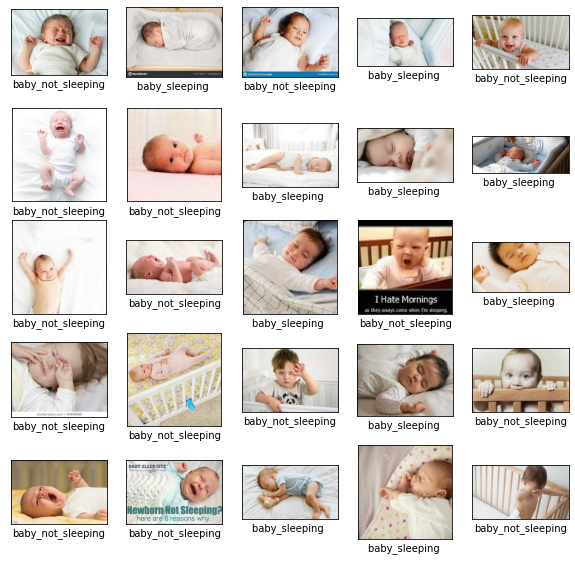

In [42]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Step 2: Customize the TensorFlow Model with mobilenet_v2

Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.


In [43]:
#model = image_classifier.create(train_data, validation_data=validation_data, epochs=20)
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data,epochs=20)


INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_8 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


4/4 [==============================] - 5s 413ms/step - loss: 1.2022 - accuracy: 0.4531
Epoch 2/20
4/4 [==============================] - 2s 440ms/step - loss: 0.7575 - accuracy: 0.6172
Epoch 3/20
4/4 [==============================] - 2s 416ms/step - loss: 0.5316 - accuracy: 0.8047
Epoch 4/20
4/4 [==============================] - 2s 372ms/step - loss: 0.5107 - accuracy: 0.8047
Epoch 5/20
4/4 [==============================] - 2s 456ms/step - loss: 0.4944 - accuracy: 0.8828
Epoch 6/20
4/4 [==============================] - 2s 474ms/step - loss: 0.4382 - accuracy: 0.8594
Epoch 7/20
4/4 [==============================] - 1s 412ms/step - loss: 0.3969 - accuracy: 0.9062
Epoch 8/20
4/4 [==============================] - 2s 394ms/step - loss: 0.3573 - accuracy: 0.9297
Epoch 9/20
4/4 [==============================] - 2s 351ms/step - loss: 0.3539 - accuracy: 0.9297
Epoch 10/20
4/4 [==============================] - 2s 309ms/step - loss: 0.2866 - accuracy: 0.9766
Epoch 11/20
4/4 [=============

Have a look at the detailed model structure.

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


### Step 3: Evaluate the Customized Model

Evaluate the result of the model, get the loss and accuracy of the model.

In [44]:
loss, accuracy = model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 0.4474 - accuracy: 0.8333


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

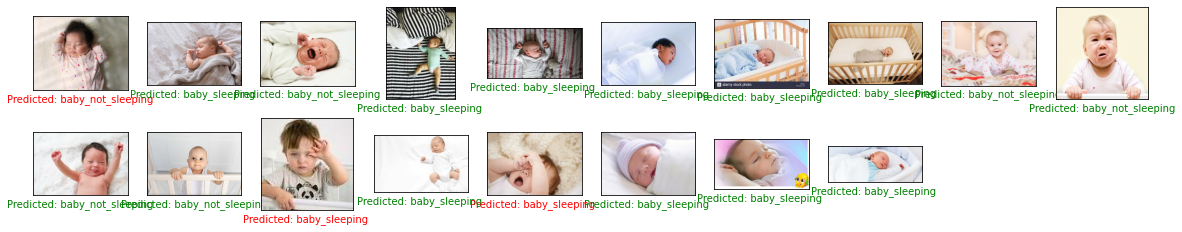

In [45]:
# A helper function that returns 'red'/'green' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'green'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

#Training with augmented images

In [46]:
#Training with augmented images
image_path = '/content/drive/MyDrive/train_bms_aug'
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 3362, num_label: 2, labels: baby_not_sleeping_aug, baby_sleeping_aug.


INFO:tensorflow:Load image with size: 3362, num_label: 2, labels: baby_not_sleeping_aug, baby_sleeping_aug.


In [47]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

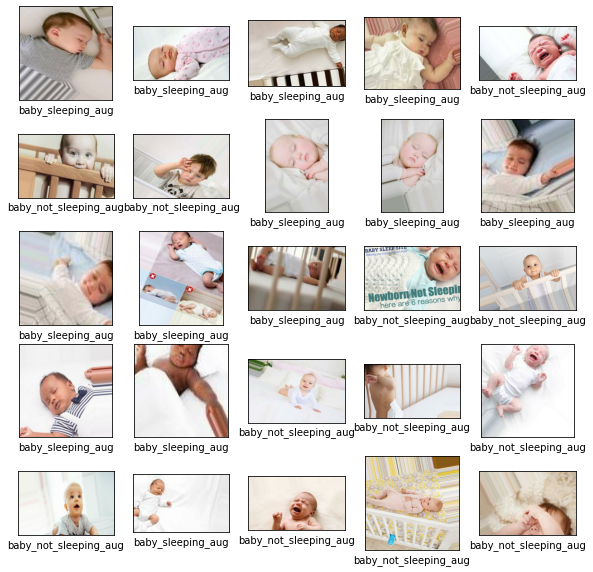

In [48]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [49]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data,epochs=20)


INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_9 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


84/84 [==============================] - 43s 470ms/step - loss: 0.4615 - accuracy: 0.8389 - val_loss: 0.3418 - val_accuracy: 0.9344
Epoch 2/20
84/84 [==============================] - 39s 466ms/step - loss: 0.3475 - accuracy: 0.9144 - val_loss: 0.3146 - val_accuracy: 0.9469
Epoch 3/20
84/84 [==============================] - 39s 473ms/step - loss: 0.3232 - accuracy: 0.9423 - val_loss: 0.3101 - val_accuracy: 0.9625
Epoch 4/20
84/84 [==============================] - 39s 473ms/step - loss: 0.3048 - accuracy: 0.9554 - val_loss: 0.3098 - val_accuracy: 0.9594
Epoch 5/20
84/84 [==============================] - 41s 498ms/step - loss: 0.2990 - accuracy: 0.9550 - val_loss: 0.3185 - val_accuracy: 0.9500
Epoch 6/20
84/84 [==============================] - 37s 439ms/step - loss: 0.3032 - accuracy: 0.9494 - val_loss: 0.2992 - val_accuracy: 0.9656
Epoch 7/20
84/84 [==============================] - 37s 442ms/step - loss: 0.3057 - accuracy: 0.9576 - val_loss: 0.3476 - val_accuracy: 0.9312
Epoch 8/20

## Evaluate the model

In [50]:
loss, accuracy = model.evaluate(test_data)

11/11 [==============================] - 10s 384ms/step - loss: 0.2776 - accuracy: 0.9703


### Step 4: Export to TensorFlow Lite Model

Convert the trained model to TensorFlow Lite model format with [metadata](https://www.tensorflow.org/lite/convert/metadata) so that you can later use in an on-device ML application. The label file and the vocab file are embedded in metadata. The default TFLite filename is `model.tflite`.

In many on-device ML application, the model size is an important factor. Therefore, it is recommended that you apply quantize the model to make it smaller and potentially run faster.
The default post-training quantization technique is full interger quantization for the image classification task.

In [51]:
model.export(export_dir='baby_status')

INFO:tensorflow:Assets written to: /tmp/tmp146nypqh/assets


INFO:tensorflow:Assets written to: /tmp/tmp146nypqh/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpw4klj4s9/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpw4klj4s9/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: baby_status/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: baby_status/model.tflite


See [example applications and guides of image classification](https://www.tensorflow.org/lite/models/image_classification/overview#example_applications_and_guides) for more details about how to integrate the TensorFlow Lite model into mobile apps.

This model can be integrated into an Android or an iOS app using the [ImageClassifier API](https://www.tensorflow.org/lite/inference_with_metadata/task_library/image_classifier) of the [TensorFlow Lite Task Library](https://www.tensorflow.org/lite/inference_with_metadata/task_library/overview).

In [52]:
model.export(export_dir='tensorflowlite_model', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in tensorflowlite_model/labels.txt


INFO:tensorflow:Saving labels in tensorflowlite_model/labels.txt


You can also evaluate the tflite model with the `evaluate_tflite` method.

In [53]:
model.evaluate_tflite('model.tflite', test_data)

{'accuracy': 0.8783382789317508}

## Customize Post-training quantization on the TensorFLow Lite model


[Post-training quantization](https://www.tensorflow.org/lite/performance/post_training_quantization) is a conversion technique that can reduce model size and inference latency, while also improving CPU and hardware accelerator inference speed, with a little degradation in model accuracy. Thus, it's widely used to optimize the model.


Model Maker library applies a default post-training quantization techique when exporting the model. If you want to customize post-training quantization, Model Maker supports multiple post-training quantization options using [QuantizationConfig](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/config/QuantizationConfig) as well. Let's take float16 quantization as an instance. First, define the quantization config.

In [54]:
config = QuantizationConfig.for_float16()

Then we export the TensorFlow Lite model with such configuration.

In [55]:
model.export(export_dir='.', tflite_filename='model_fp16.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpl0ip8vdw/assets


INFO:tensorflow:Assets written to: /tmp/tmpl0ip8vdw/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpqxbvmyc4/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpqxbvmyc4/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


In Colab, you can download the model named `model_fp16.tflite` from the left sidebar, same as the uploading part mentioned above.

## Change the model to EfficientNet-Lite0.


### Change to the model that's supported in this library.

This library supports  EfficientNet-Lite models, MobileNetV2, ResNet50 by now. [EfficientNet-Lite](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite) are a family of image classification models that could achieve state-of-art accuracy and suitable for Edge devices. The default model is EfficientNet-Lite0.

We could switch model to MobileNetV2 by just setting parameter `model_spec` to the MobileNetV2 model specification in `create` method.

In [56]:
model = image_classifier.create(train_data,validation_data=validation_data,epochs=20)


INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_10 (Hub (None, 1280)              3413024   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
84/84 [==============================] - 42s 473ms/step - loss: 0.4686 - accuracy: 0.8162 - val_loss: 0.3516 - val_accuracy: 0.9250
Epoch 2/20
84/84 [==============================] - 39s 468ms/step - loss: 0.3496 - accuracy: 0.9163 - val_loss: 0.3132 - val_accuracy: 0.9531
Epoch 3/20
84/84 [==============================] - 39s 468ms/step - loss: 0.3279 - accuracy: 0.9342 - val_loss: 0.2998 - val_accuracy: 0.9625
Epoch 4/20
84/84 [==============================] - 40s 480ms/step - loss: 0.3160 - accuracy: 0.9446 - val_loss: 0.2906 - val_accuracy: 0.9781
Epoch 5/20
84/84 [==============================] - 40s 478ms/step - loss: 0.3012 - accuracy: 0.9513 - val_loss: 0.2874 - val_accuracy: 0.9656
Epoch 6/20
84/84 [==============================] - 36s 435ms/step - loss: 0.3033 - accuracy: 0.9550 - val_loss: 0.2779 - val_accuracy: 0.9812
Epoch 7/20
84/84 [==============================] - 37s 439ms/step - loss: 0.2977 - accuracy: 0.9546 - val_loss: 0.2780 - val_accuracy: 0.9719

Evaluate the newly retrained MobileNetV2 model to see the accuracy and loss in testing data.

In [57]:
loss, accuracy = model.evaluate(test_data)

11/11 [==============================] - 10s 349ms/step - loss: 0.2750 - accuracy: 0.9585


### Change to the model in TensorFlow Hub

Moreover, we could also switch to other new models that inputs an image and outputs a feature vector with TensorFlow Hub format.

As [Inception V3](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1) model as an example, we could define `inception_v3_spec` which is an object of [image_classifier.ModelSpec](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/image_classifier/ModelSpec) and contains the specification of the Inception V3 model.

We need to specify the model name `name`, the url of the TensorFlow Hub model `uri`. Meanwhile, the default value of `input_image_shape` is `[224, 224]`. We need to change it to `[299, 299]` for Inception V3 model.

In [58]:
inception_v3_spec = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

In [59]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=20)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_11 (Hub (None, 1280)              3413024   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 2562      
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
84/84 [==============================] - 42s 477ms/step - loss: 0.4830 - accuracy: 0.8054 - val_loss: 0.3579 - val_accuracy: 0.9312
Epoch 2/20
84/84 [==============================] - 39s 471ms/step - loss: 0.3587 - accuracy: 0.9103 - val_loss: 0.3147 - val_accuracy: 0.9563
Epoch 3/20
84/84 [==============================] - 39s 469ms/step - loss: 0.3304 - accuracy: 0.9349 - val_loss: 0.3029 - val_accuracy: 0.9750
Epoch 4/20
84/84 [==============================] - 39s 469ms/step - loss: 0.3150 - accuracy: 0.9427 - val_loss: 0.2909 - val_accuracy: 0.9625
Epoch 5/20
84/84 [==============================] - 41s 493ms/step - loss: 0.3091 - accuracy: 0.9487 - val_loss: 0.2860 - val_accuracy: 0.9719
Epoch 6/20
84/84 [==============================] - 38s 458ms/step - loss: 0.3042 - accuracy: 0.9498 - val_loss: 0.2864 - val_accuracy: 0.9594
Epoch 7/20
84/84 [==============================] - 36s 435ms/step - loss: 0.3002 - accuracy: 0.9572 - val_loss: 0.2837 - val_accuracy: 0.9625

Evaluate the newly retrained model with 10 training epochs.

In [60]:
loss, accuracy = model.evaluate(test_data)

11/11 [==============================] - 10s 358ms/step - loss: 0.2720 - accuracy: 0.9703
